# Face Detection 人間の顔を自動で認識するDeep Learningの実装

![title](https://cdn-images-1.medium.com/max/828/1*y9i52iJNBAKiUffJb3juBg.png)

## Step 1. BACKGROUND ON FACE DETECTION なぜ「人間の顔検出」は重要か？
   
・Computer Visionの中でも最もホットな領域の１つ  
・Facebookで勝手に自分の名前がタグづけされる機能など    
・今回は人物識別の最初のステップである顔検出に挑戦する  

![title](https://cdn.iphonelife.com/sites/iphonelife.com/files/styles/promo_in_content_breakpoints_theme_newmango_mobile_2x/public/shutterstock_747751027.jpg?itok=Hg0YJ54i)

In [106]:
import cv2
import matplotlib.pyplot as plt
import time 

%matplotlib inline

## Step 2. THEORY OF FACE DETECTION CLASSIFIERS

【目的】：顔検出は2値分類である。ある特定の画像pの中から、「人間の顔」と「それ以外の要素」という分類をする。  
【方法】：キーワードは"Grey Scale"、色の情報は顔の検出には必要ない。明暗だけが重要になる。  
  
1. Haar Classifier
2. LBP Classifier   
   

![title](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Beyoglu_4671_tricolor.png/400px-Beyoglu_4671_tricolor.png)

In [131]:
# RGBとは，色を指定するための値のこと。赤，緑，青の各色を0～255の値で指定すると，値の組み合わせによって色が決まる
# Pillowの関数とOpenCVの関数を両方使いたい場合は、BGR（青、緑、赤）から RGB（赤、緑、青）に変換する必要がある

def Convert_to_RGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

メモ：OpenCVはグレースケールのもとでワークする仕様になっている

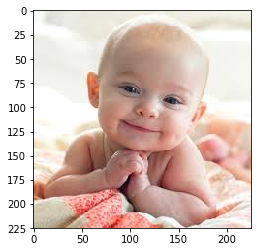

In [65]:
# テスト用の画像Aをロード
test1 = cv2.imread('test1.jpg')

# 画像を確認
plt.imshow(Convert_to_RGB(test1))

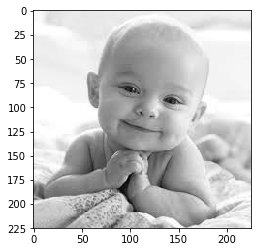

In [66]:
# 画像Aをグレースケールにする
gray_test1 = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

# 画像を確認
plt.imshow(gray_test1, cmap='gray')

## 2.1 HAAR CASCADE CLASSIFIER with using Adaboost

![title](https://www.researchgate.net/profile/Shih-Lien_Lu/publication/224141453/figure/fig1/AS:302892893392897@1449226701355/Face-detection-flow-based-on-the-Haar-classifier.png)

In [60]:
#カスケード分類器を準備する
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')

ここでようやく顔の検出に移る   
".detectMultiScale()" ファンクションのパラメータを画像のサイズや拡張子によって調整する必要がある

In [67]:
# マルチスケールで複数の顔を検知することができるようにする
faces = haar_face_cascade.detectMultiScale(gray_test1, scaleFactor=1.1, minNeighbors=5)

# まず写真にある顔の数を出力する
print('The number of face is : ', len(faces))

The number of face is :  1


In [69]:
# 顔を枠で囲む        
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

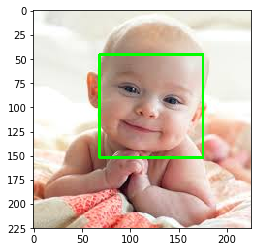

In [70]:
# 画像の色彩表現をRGB形式に直して表示する
plt.imshow(Convert_to_RGB(test1))

少しずれているので調整する必要がある

### 「顔検出」に必要なOpenCVの関数をパイプライン化する

In [117]:
def detect_faces(face_cascade, color_img, scaleFactor = 1.1):
    # 画像のコピーを作る
    copy_img = color_img.copy()
    # グレースケール化
    gray_img = cv2.cvtColor(copy_img, cv2.COLOR_BGR2GRAY)
    # 複数の顔を検出する。引数に指定するカスケード分類器によって使い分けられる。
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=scaleFactor, minNeighbors=5)
    # 検出した顔に一つ一つ枠をつけていく
    for (x, y, w, h) in faces:
        cv2.rectangle(copy_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    return copy_img

In [122]:
def detect_faces(face_cascade, color_img, scaleFactor = 1.1):

    # グレースケール化
    gray_img = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    # 複数の顔を検出する。引数に指定するカスケード分類器によって使い分けられる。
    faces = face_cascade.detectMultiScale(gray_img, scaleFactor=scaleFactor, minNeighbors=5)
    # 検出した顔に一つ一つ枠をつけていく
    for (x, y, w, h) in faces:
        cv2.rectangle(color_img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    return color_img

パイプラインが正常に機能するか他の画像でも試してみる

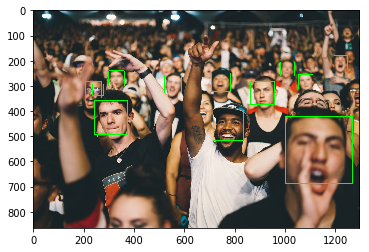

In [55]:
# 新しい画像の読み込み
test2 = cv2.imread("test3.jpg")

# パイプラインに流して、枠付き画像を作る
faces_detected_img = detect_faces(haar_face_cascade, test2)
 
# 表示する
plt.imshow(Convert_to_RGB(faces_detected_img))

こんなに大勢の顔があってもこの精度は驚き！  
いくつかの画像で試してみる。

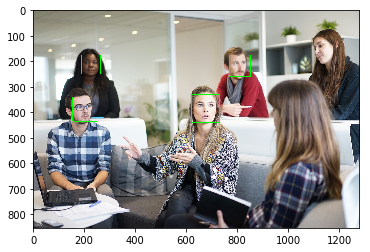

In [82]:
# 新しい画像の読み込み
test2 = cv2.imread("test8.jpg")

# パイプラインに流して、枠付き画像を作る
faces_detected_img = detect_faces(haar_face_cascade, test2)
 
# 表示する
plt.imshow(Convert_to_RGB(faces_detected_img))

パラメータ"scaleFactor"を調整することで画像内の顔の大きさに影響を受けずに出力することが可能

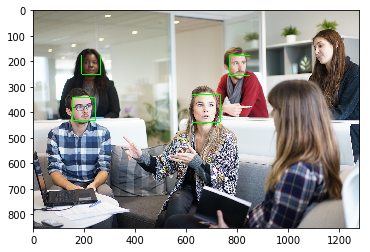

In [88]:
# 新しい画像の読み込み
test2 = cv2.imread("test8.jpg")

# パイプラインに流して、枠付き画像を作る
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor = 1.3)
 
# 表示する
plt.imshow(Convert_to_RGB(faces_detected_img))

## 2.2 LBP CASCADE CLASSIFIER ( LBP : Local Binary Pattern )

![title](http://warmspringwinds.github.io/assets/img/mb_lbp.jpeg)

先ほど、"HAAR CASCADE"を適応した画像に"LBP"を適応して違いを観察する

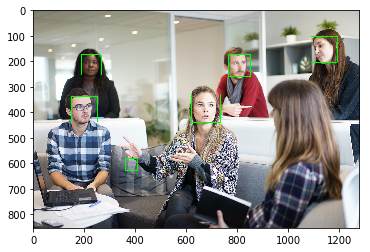

In [96]:
# LBP分類器の学習用ファイルをロードする
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')

# テスト用イメージのロード
test2 = cv2.imread('test8.jpg') 

# パイプラインのアルゴリズムをLBPに変更して、枠付きの画像を生成  
faces_detected_img = detect_faces(lbp_face_cascade, test2)

# カラー画像に変換して表示する
plt.imshow(Convert_to_RGB(faces_detected_img))

"HARR"で検出できなかった右上の女性が検出可能に！

## 2.3 HAAR VS. LBP. WHICH IS BEST FOR FACE DETECTION?

![title](https://www.superdatascience.com/wp-content/uploads/2017/07/haar-vs-lbp.png)

両者の違いは以下になります。ユースケースはこうです。

## Step 3. HAAR VS. LBP RESULTS ANALYSIS

### Test 1. スピード × 精度

In [141]:
# 2つの分類器のトレーニング用データをロードする
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml') 
lbp_face_cascade = cv2.CascadeClassifier('lbpcascade_frontalface.xml')  
 
# テスト用の画像を読み込む
test11 = cv2.imread('test13.jpg') 
test12 = cv2.imread('test12.jpg')

 Haar


In [137]:
#note time before detection 
t1 = time.time()

#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test12)
#note time after detection 
t2 = time.time()
#calculate time difference 
dt1 = t2 - t1
#print the time difference

LBP

In [138]:
#note time before detection
t1 = time.time()

#call our function to detect faces 
lbp_detected_img = detect_faces(lbp_face_cascade, test12)

#note time after detection 
t2 = time.time()
#calculate time difference 
dt2 = t2 - t1
#print the time difference

検出までのスピードと検出結果を比較する

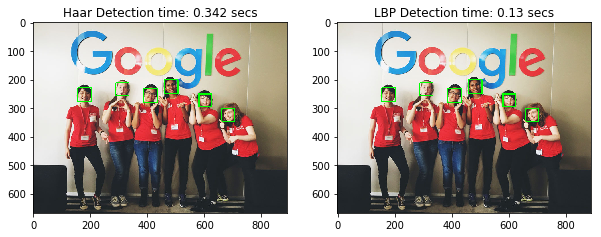

In [139]:
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(Convert_to_RGB(haar_detected_img))

#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(Convert_to_RGB(lbp_detected_img))

#show images 
# plt.imshow(faces_detected_img)

顔検出の結果は変わらないものの、LBPの方が処理即度が約3倍早い！

### Test 1. スピード × 精度

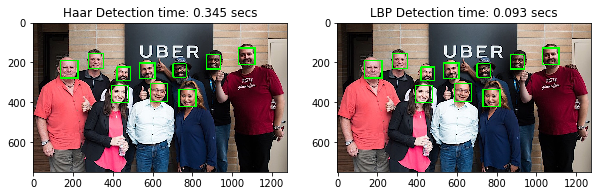

In [147]:
#------------HAAR----------- 
#note time before detection
t1 = time.time()

#call our function to detect faces 
haar_detected_img = detect_faces(haar_face_cascade, test11, scaleFactor = 1.2)

#note time after detection
t2 = time.time()
#calculate time difference 
dt1 = t2 - t1
#print the time difference  

#------------LBP----------- 
#note time before detection
t1 = time.time()

#call our function to detect faces
lbp_detected_img = detect_faces(lbp_face_cascade, test11, scaleFactor = 1.2)

#note time after detection 
t2 = time.time()
#calculate time difference 
dt2 = t2 - t1
#print the time difference  

#----------Let's do some fancy drawing------------- 
#create a figure of 2 plots (one for Haar and one for LBP) 
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

 #show Haar image 
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(Convert_to_RGB(haar_detected_img))

#show LBP image 
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(Convert_to_RGB(lbp_detected_img))

# まとめ